## Analyse des Algorithmes d'Optimisation

In [10]:
#Importer les librairies necessaires

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt

In [13]:
# 1. Charger et prétraiter les données
def generate_dataset():
    np.random.seed(42)
    X = np.random.rand(1000, 1) * 10  # Générer des données entre 0 et 10
    y = 3 * X + np.random.randn(1000, 1) * 2  # y = 3x + bruit
    return X, y
X, y = generate_dataset()


In [14]:
# Normalisation

X_mean, X_std = np.mean(X), np.std(X)
X = (X - X_mean) / X_std
y_mean, y_std = np.mean(y), np.std(y)
y = (y - y_mean) / y_std

In [15]:
# Division des données
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


### Construction du Modèle


In [16]:
# 2. Fonction pour construire le modèle
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dense(32, activation='relu'),
        Dense(1)  # Pas d'activation pour une tâche de régression
    ])
    return model


In [17]:
# 3. Entraînement avec différents optimisateurs
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'SGD with Momentum': SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.01),
    'Adam': Adam(learning_rate=0.01)
}

histories = {}

for name, optimizer in optimizers.items():
    print(f"Training with {name}...")
    model = build_model()
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)
    histories[name] = history

    

Training with SGD...


c:\Users\Yoga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with SGD with Momentum...
Training with RMSprop...
Training with Adam...


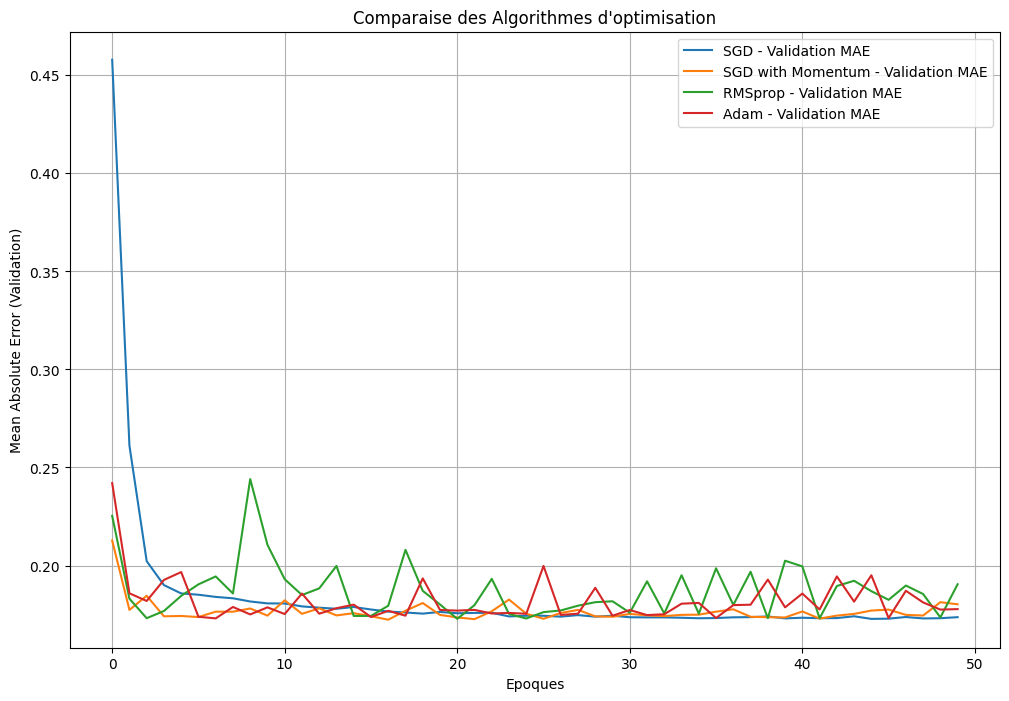

In [19]:
# 4. Visualisation des résultats
plt.figure(figsize=(12, 8))
for name, history in histories.items():
    plt.plot(history.history['val_mean_absolute_error'], label=f'{name} - Validation MAE')

plt.title('Comparaise des Algorithmes d\'optimisation')
plt.xlabel('Epoques')
plt.ylabel('Mean Absolute Error (Validation)')
plt.legend()
plt.grid(True)
plt.show()

### Analyse et Discussion

In [22]:
# 5. Analyse et Discussion

# Identifier l'optimiseur avec la convergence la plus rapide
best_optimizer = min(histories, key=lambda x: min(histories[x].history['val_mean_absolute_error']))
print(f"L'optimiseur qui converge le plus rapidement est {best_optimizer} avec une MAE minimale de {min(histories[best_optimizer].history['val_mean_absolute_error']):.4f}.")

# Identifier l'optimiseur avec la plus faible erreur finale
final_mae = {name: history.history['val_mean_absolute_error'][-1] for name, history in histories.items()}
optimal_final = min(final_mae, key=final_mae.get)
print(f"L'optimiseur avec la plus faible MAE finale est {optimal_final} avec une MAE de {final_mae[optimal_final]:.4f}.")

# Analyser les oscillations
oscillations = {name: np.std(history.history['val_mean_absolute_error']) for name, history in histories.items()}
least_oscillations = min(oscillations, key=oscillations.get)
print(f"L'optimiseur avec le moins d'oscillations est {least_oscillations} (std = {oscillations[least_oscillations]:.4f}).")

# Discussion sur Adam
print("\nAdam tend à être performant car il combine les avantages de RMSprop et Momentum, s'adaptant dynamiquement au learning rate et utilisant des moyennes mobiles des gradients.")

# Impact des hyperparamètres
print("- Learning rate (η) : Contrôle la vitesse de convergence. Un η trop élevé peut entraîner des oscillations, trop faible ralentit l'apprentissage.")
print("- Momentum (β) : Stabilise les oscillations pour SGD en accumulant les gradients passés.")


L'optimiseur qui converge le plus rapidement est SGD with Momentum avec une MAE minimale de 0.1724.
L'optimiseur avec la plus faible MAE finale est SGD avec une MAE de 0.1737.
L'optimiseur avec le moins d'oscillations est SGD with Momentum (std = 0.0058).

Adam tend à être performant car il combine les avantages de RMSprop et Momentum, s'adaptant dynamiquement au learning rate et utilisant des moyennes mobiles des gradients.
- Learning rate (η) : Contrôle la vitesse de convergence. Un η trop élevé peut entraîner des oscillations, trop faible ralentit l'apprentissage.
- Momentum (β) : Stabilise les oscillations pour SGD en accumulant les gradients passés.
